Using Theano backend.


6711
(6711L, 1225L)
(6711L,)
('X_train shape:', (5368L, 1L, 35L, 35L))
(5368L, 'train samples')
(1343L, 'test samples')
Train on 4294 samples, validate on 1074 samples
Epoch 1/50
4294/4294 [==============================] - 78s - loss: 0.2483 - acc: 0.8773 - val_loss: 0.2191 - val_acc: 0.8820
Epoch 2/50
4294/4294 [==============================] - 76s - loss: 0.2292 - acc: 0.8794 - val_loss: 0.2437 - val_acc: 0.8750
Epoch 3/50
4294/4294 [==============================] - 77s - loss: 0.2194 - acc: 0.8886 - val_loss: 0.2195 - val_acc: 0.8820
Epoch 4/50
4294/4294 [==============================] - 81s - loss: 0.1915 - acc: 0.9183 - val_loss: 0.1607 - val_acc: 0.9366
Epoch 5/50
4294/4294 [==============================] - 78s - loss: 0.1695 - acc: 0.9326 - val_loss: 0.1540 - val_acc: 0.9406
Epoch 6/50
4294/4294 [==============================] - 78s - loss: 0.1589 - acc: 0.9393 - val_loss: 0.1593 - val_acc: 0.9361
Epoch 7/50
4294/4294 [==============================] - 79s - loss: 0.1495 -

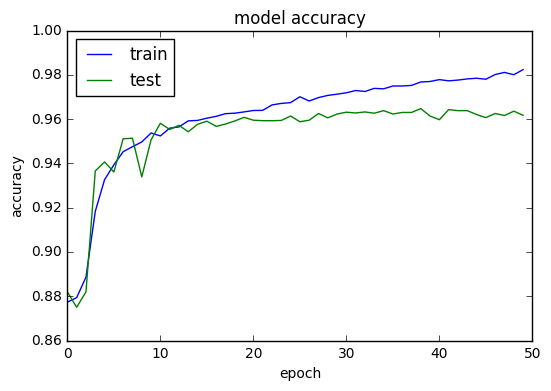

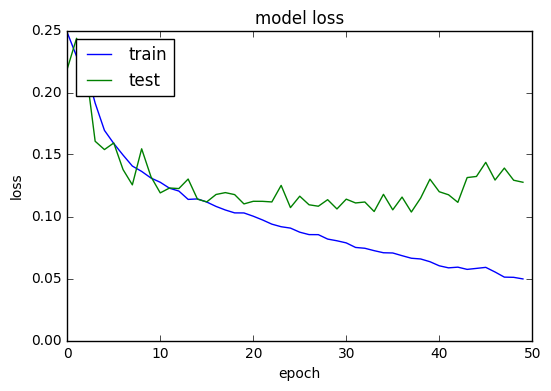

('Test score:', 0.13056112664432021)
('Test accuracy:', 0.96044303797468356)
Baseline Error: 3.96%
1343/1343 [==============================] - 9s     
[5 4 2 ..., 4 4 4]
1343/1343 [==============================] - 8s     


C:\Users\dundeva\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    precision    recall  f1-score   support

    class 0(Anger)       0.12      0.04      0.06        25
 class 1(Contempt)       0.00      0.00      0.00         2
  class 2(Disgust)       0.40      0.29      0.33         7
     class 3(Fear)       0.50      0.67      0.57         9
class 4(Happiness)       0.86      0.90      0.88       534
  class 5(Nuetral)       0.86      0.89      0.87       700
  class 6(Sadness)       0.75      0.12      0.21        25
 class 7(Surprise)       0.35      0.22      0.27        41

       avg / total       0.82      0.84      0.82      1343

[[  1   0   0   0   4  15   1   4]
 [  0   0   0   0   1   1   0   0]
 [  2   0   2   1   1   1   0   0]
 [  0   0   2   6   0   1   0   0]
 [  1   0   0   0 480  51   0   2]
 [  2   0   0   1  60 626   0  11]
 [  1   0   1   3   4  13   3   0]
 [  1   0   0   1   7  23   0   9]]
1343/1343 [==============================] - 9s     


col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,1,0,2,0,1,2,1,1
2,0,0,2,2,0,0,1,0
3,0,0,1,6,0,1,3,1
4,4,1,1,0,480,60,4,7
5,15,1,1,1,51,626,13,23
6,1,0,0,0,0,0,3,0
7,4,0,0,0,2,11,0,9


In [1]:
from keras import backend as K
K.set_image_dim_ordering('th')
import pandas as pd
from keras.regularizers import l2
from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam,Adadelta, Adagrad
from keras.utils import np_utils
from sklearn.metrics import classification_report,confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.advanced_activations import LeakyReLU
from matplotlib import pyplot
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
import theano
from PIL import Image
from numpy import *

# input image dimensions
img_rows, img_cols =35,35

# number of channels
img_channels =1


#  data
path1 = 'C:/Users/dundeva/Documents/CroppedImages'    #path of folder of images    
path2 = 'C:/Users/dundeva/Documents/AugmentedImages/data/train'  #path of folder of saved images  

listing = os.listdir(path1) 
num_samples=size(listing)
print num_samples


for file in listing:
    im = Image.open(path1 + '//' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                           
    gray.save(path2 +'//' +  file)

imlist = os.listdir(path1)

im1 = array(Image.open('C:/Users/dundeva/Documents/AugmentedImages/data/train' + '//'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open('C:/Users/dundeva/Documents/AugmentedImages/data/train'+ '//' + im2)).flatten()
              for im2 in imlist],'f')
#Labels
label=np.ones((num_samples,),dtype = int)
label[0:129]=0#Anger
label[129:136]=1#Contempt
label[136:168]=2#Disgust
label[168:211]=3#Fear
label[211:2812]=4#Happiness
label[2812:6393]=5#Nuetral
label[6393:6505]=6#Sadness
label[6505:6711]=7#Surprise

#shuffle  images and labels
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

print (train_data[0].shape)
print (train_data[1].shape)

#batch_size to train
batch_size = 125

# number of output classes
nb_classes =8

# number of epochs to train
nb_epoch =50

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
nb_pool = 3

# convolution kernel size
nb_conv = 3

(X, y) = (train_data[0],train_data[1])

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary classes
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#CNN layers
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

#Compile Model 
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=["accuracy"])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1,validation_split=0.2 )#validation_data=(X_test, Y_test)

#Evaluate test set
score = model.evaluate(X_test, Y_test, verbose=0)

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('Test score:', score[0])
print('Test accuracy:', score[1])
print("Baseline Error: %.2f%%" % (100-score[1]*100))
#print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test, show_accuracy=True)[1])

y_pred = model.predict_classes(X_test)
print(y_pred)

p=model.predict_proba(X_test) # to predict probability

target_names = ['class 0(Anger)', 'class 1(Contempt)', 'class 2(Disgust)', 
                'class 3(Fear)', 'class 4(Happiness)', 'class 5(Nuetral)'
               , 'class 6(Sadness)', 'class 7(Surprise)']

print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

# Confusion Matrix
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)
